## Importing libraries

In [1]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns;
import numpy as np;
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
boston = load_boston()
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor

In [2]:
print(boston.data.shape)

(506, 13)


In [3]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


## Importing Data

In [4]:

X_data = pd.DataFrame(boston.data)
y_data = pd.DataFrame(boston.target)

In [5]:
norm = StandardScaler()
norm.fit(X_data)
X_1=pd.DataFrame(norm.transform(X_data))

In [6]:
bigdata = pd.concat([X_1,y_data], axis=1,ignore_index=True)

In [7]:
bigdata.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.417713,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.415269,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6


## My Own SGD implementation

In [109]:
w=pd.DataFrame(X_1.loc[0,:])
w=w.T

In [110]:
w

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.417713,0.28483,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459,0.441052,-1.075562


In [111]:
b = -1.982843
r=1

In [112]:
while(True):
    data_random=bigdata.sample(n=100)
    data_random=data_random.reset_index(drop=True)
    X=data_random.loc[:,0:12] 
    y=data_random.loc[:,13]
    finalW=0.0
    finalB=0.0
    for j in range(100):
        finalW+=-2*X.loc[j]*(y.loc[j]-np.dot(X.loc[j],w.T)-b)
        finalB+=float(-2*(y.loc[j]-np.dot(X.loc[j],w.T)-b))              
    w0=w-r*(finalW/100)
    b0=b-r*(finalB/100)
    r=r/2
    if(np.array(w)==np.array(w0)).all():
        break;
    else:
        w=w0
        b=b0


In [113]:
w0

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.26278,-0.508248,-0.350512,0.343687,-0.571994,4.117632,0.490615,-0.767429,-0.336776,0.5931,-2.001889,1.390416,-3.575728


In [114]:
b0

22.542622099781354

In [115]:
y_pred=[]
X=bigdata.loc[:,0:12]
y=bigdata.loc[:,13]
for i in range(506):
    y_pred.append(np.dot(X.loc[i],w0.T)+b0)
y_pred=np.asarray(y_pred)

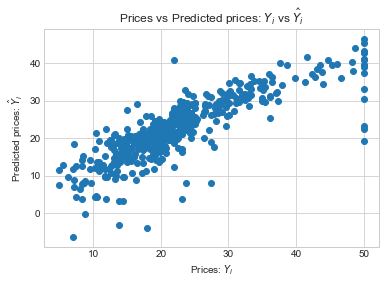

In [116]:
import matplotlib.pyplot as plt


plt.scatter(y, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

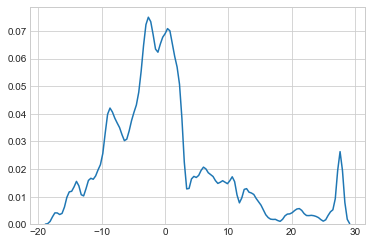

In [117]:
for i in range(506):
    delta_y=y-y_pred[i]

sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()


In [118]:
print(mean_squared_error(y,y_pred))

25.911953139691168


## SGD regressor of sklearn

In [119]:
import warnings
warnings.filterwarnings("ignore")
clf = SGDRegressor()
clf.fit(X_1, y_data)
print(mean_squared_error(y_data, clf.predict(X_1)))

22.78061237519471


In [146]:
SGD_sk=pd.DataFrame(list(clf.coef_))

In [122]:
clf.intercept_

array([22.33127935])

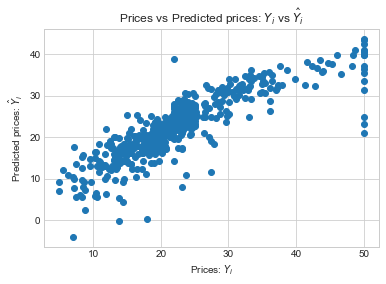

In [120]:
plt.scatter(y_data, clf.predict(X_1))
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

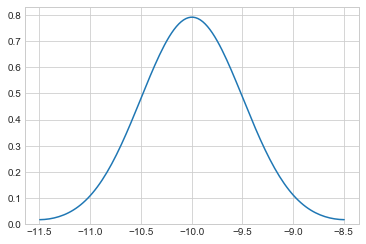

In [80]:
for i in range(506):
    delta_y=y_data.loc[i]-y_pred2[i]

sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

# Summary

In [149]:
from prettytable import PrettyTable   
x = PrettyTable()
x.field_names = ["Parameters", "Own SGD", "Sklearn SGD"]
x.add_row(["Mean Squared error",  25.9119, 22.7806])
x.add_row(["Intercept term ",  22.5426, 22.3312])
print(x)

+--------------------+---------+-------------+
|     Parameters     | Own SGD | Sklearn SGD |
+--------------------+---------+-------------+
| Mean Squared error | 25.9119 |   22.7806   |
|  Intercept term    | 22.5426 |   22.3312   |
+--------------------+---------+-------------+


In [148]:
from IPython.display import HTML, display
import tabulate
print("My own SGD weights")
display(HTML(tabulate.tabulate(w0,tablefmt='html',showindex=False)))
print("Sklearn SGD weights")
display(HTML(tabulate.tabulate(SGD_sk.T,tablefmt='html',showindex=False)))


My own SGD weights


-0.26278,-0.508248,-0.350512,0.343687,-0.571994,4.11763,0.490615,-0.767429,-0.336776,0.5931,-2.00189,1.39042,-3.57573


Sklearn SGD weights


-0.674931,0.570432,-0.368917,0.779491,-1.06763,3.15977,-0.163153,-2.09836,0.869476,-0.453417,-1.86616,0.886736,-3.3702
